ChessBoard case1

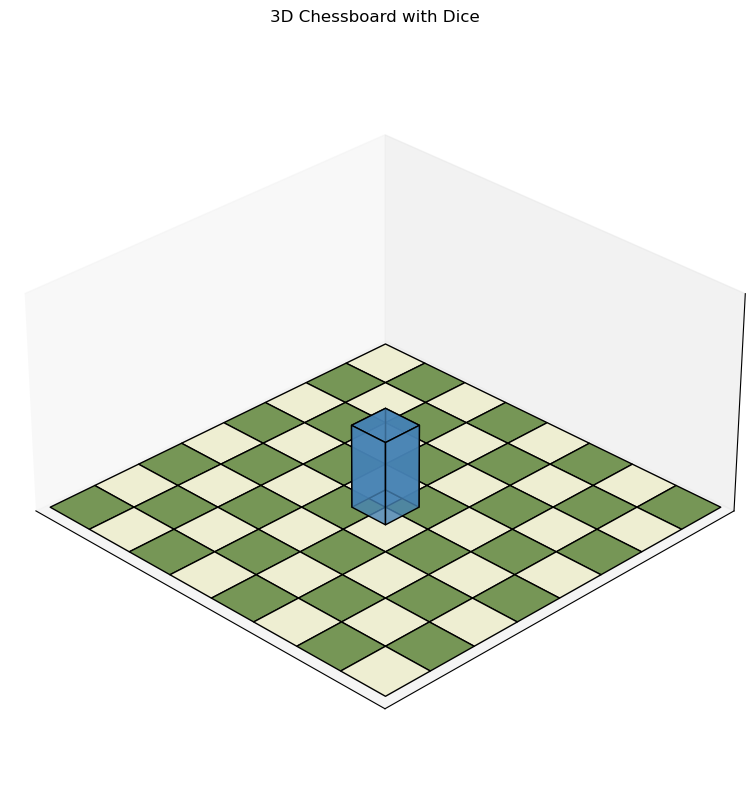

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

class Chessboard3D:
    def __init__(self, size=8, square_size=1):
        self.size = size
        self.square_size = square_size
        self.dark_color = '#769656'
        self.light_color = '#eeeed2'
    
    def draw(self, ax):
        """Draw a 3D chessboard on the given axes"""
        for i in range(self.size):
            for j in range(self.size):
                color = self.dark_color if (i + j) % 2 == 0 else self.light_color
                vertices = [
                    [i, j, 0],
                    [i+1, j, 0],
                    [i+1, j+1, 0],
                    [i, j+1, 0]
                ]
                square = Poly3DCollection([vertices], color=color)
                square.set_edgecolor('black')
                ax.add_collection3d(square)

class Dice3D:
    def __init__(self, size=1, color='#4682b4'):
        self.size = size
        self.color = color
        self.edge_color = 'black'
        self.alpha = 0.8
    
    def draw(self, ax, center):
        """Draw a 3D cube (dice) at the specified center position"""
        half = self.size / 2
        cx, cy, cz = center
        
        # Define all 8 vertices of the cube
        vertices = np.array([
            [cx-half, cy-half, cz-half],  # 0: bottom back left
            [cx+half, cy-half, cz-half],   # 1: bottom back right
            [cx+half, cy+half, cz-half],   # 2: bottom front right
            [cx-half, cy+half, cz-half],    # 3: bottom front left
            [cx-half, cy-half, cz+half],    # 4: top back left
            [cx+half, cy-half, cz+half],    # 5: top back right
            [cx+half, cy+half, cz+half],    # 6: top front right
            [cx-half, cy+half, cz+half]     # 7: top front left
        ])
        
        # Define the 6 faces
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # bottom
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # top
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # back
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # front
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # right
            [vertices[0], vertices[3], vertices[7], vertices[4]]   # left
        ]
        
        # Draw each face
        for face in faces:
            poly = Poly3DCollection([face], color=self.color)
            poly.set_edgecolor(self.edge_color)
            poly.set_alpha(self.alpha)
            ax.add_collection3d(poly)

def create_3d_scene():
    """Create and configure the 3D visualization scene"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Set viewing angles and limits
    ax.view_init(elev=30, azim=-45)
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_zlim(0, 2)
    
    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # Set equal aspect ratio
    ax.set_box_aspect([1, 1, 0.5])
    
    # Add title
    ax.set_title('3D Chessboard with Dice', pad=20)
    
    return fig, ax

def main():
    # Create the scene
    fig, ax = create_3d_scene()
    
    # Draw chessboard
    board = Chessboard3D(size=8, square_size=1)
    board.draw(ax)
    
    # Draw dice
    dice = Dice3D(size=0.8, color='#4682b4')
    dice.draw(ax, center=(4, 4, 0.4))  # Positioned slightly above center
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


chessboard case 2

In [ ]:
import cv2 as cv
import numpy as np

# Load the provided chessboard image
image_path = "chessboard.png"
img = cv.imread(image_path)

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Define the chessboard size (assuming 7x7 internal corners as in the original code)
chessboard_size = (7, 7)

# Detect chessboard corners
ret, corners = cv.findChessboardCorners(gray, chessboard_size, None)

# Check if corners were detected
ret


True

In [ ]:
# Refine corner locations for better accuracy
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

# Define object points for a 3D cube
cube_axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                        [0,0,-3], [0,3,-3], [3,3,-3], [3,0,-3]])

# Define chessboard 3D points
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Assume a sample camera matrix and distortion coefficients (since we don't have calibration data)
mtx = np.array([[1000, 0, img.shape[1]//2],
                [0, 1000, img.shape[0]//2],
                [0, 0, 1]], dtype=np.float32)
dist = np.zeros(5)  # Assuming no lens distortion

# Find rotation and translation vectors
ret, rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)

# Project cube points onto the image plane
imgpts, _ = cv.projectPoints(cube_axis, rvecs, tvecs, mtx, dist)

# Convert projected points to integer values
imgpts = np.int32(imgpts).reshape(-1, 2)

# Draw ground floor (green)
img = cv.drawContours(img, [imgpts[:4]], -1, (0, 255, 0), -3)

# Draw pillars (blue)
for i, j in zip(range(4), range(4, 8)):
    img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (255, 0, 0), 3)

# Draw top layer (red)
img = cv.drawContours(img, [imgpts[4:]], -1, (0, 0, 255), 3)

# Save the output image
output_path = "chessboard_with_cube.png"
cv.imwrite(output_path, img)

# Return the output path
output_path


'chessboard_with_cube.png'

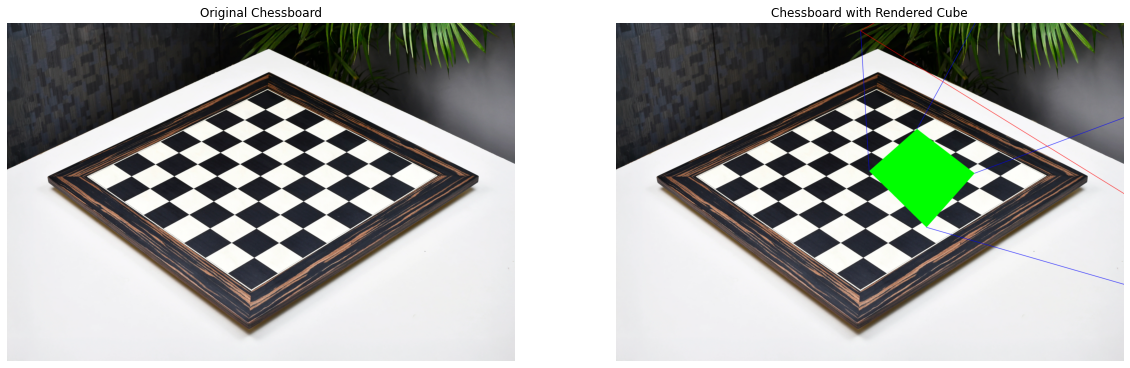

In [ ]:
import matplotlib.pyplot as plt

# Load the original image
original_img = cv.imread(image_path)
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)  # Convert for Matplotlib

# Load the processed image with the cube
processed_img = cv.imread(output_path)
processed_img = cv.cvtColor(processed_img, cv.COLOR_BGR2RGB)

# Plot both images side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

ax[0].imshow(original_img)
ax[0].set_title("Original Chessboard")
ax[0].axis("off")

ax[1].imshow(processed_img)
ax[1].set_title("Chessboard with Rendered Cube")
ax[1].axis("off")

plt.show()